# ANA 675 Assignment 3
### Kirsten Mattingly
#### January 25, 2025

## **Directions**
### 1. Train a model using simple artificial neural network and check how the performance looks like
### 2. Train a CNN and see how the model accuracy improves using the total of 10 classes shown below.
- Load and explore the data. (10 points)
- Split the data for training and testing (10 points)
- Train the model using simple artificial neural network and check how the performance 
- Select and build the model. (15 points)
- Train the model. (5 points)
- Make predictions (5 points)
- Evaluate the result (5 points)
- Train a CNN and check how the performance 
- Select and build the model. (20 points)
- Train the model. (5 points)
- Make predictions (10 points)
- Evaluate the result (10 points)
- Compare the two models (5 points)

#### Dataset Description: The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. 

In [2]:
# Load libraries and dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Examine shape of dataset
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)


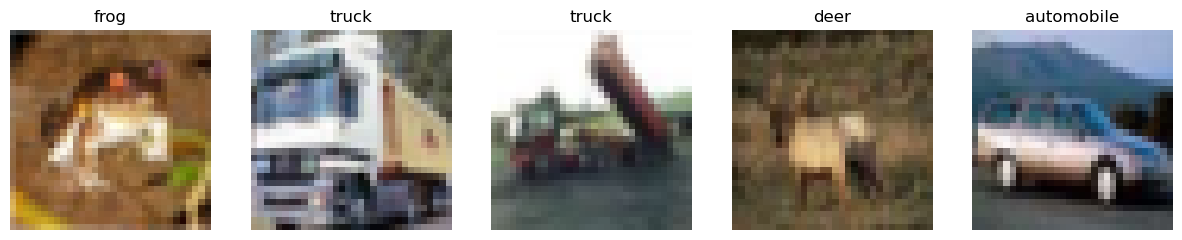

In [5]:
# Defines the list of 10 different classes (labels) for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize some images
# Plot some random images from the dataset
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_names[y_train[i][0]])
    axes[i].axis('off')
plt.show()

The CIFAR-10 dataset consists of color images with RGB channels. Each pixel's color value is represented by an integer between 0 and 255, where 0 means no color intensity (black) and 255 means full color intensity (the maximum value for that channel).

Neural networks often perform better when input features are scaled to a smaller range.

In [6]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In classification tasks, especially when using neural networks, the output layer typically uses a softmax activation function to predict class probabilities. This function outputs a probability distribution across all classes, where each output neuron corresponds to one class. To match this prediction format, the true class labels (targets) also need to be in a compatible format.

The class labels in this dataset are integers ranging from 0 to 9, indicating which class each image belongs to (e.g., a label of 3 represents "cat"). However, to use these labels in a neural network with a softmax output, we need to convert these integer labels into a format that is compatible with the softmax output, which is one-hot encoding.

In [7]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# Check to see if one-hot encoding of labels worked properly
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

y_train.shape:  (50000, 10)
y_test.shape:  (10000, 10)


### ANN Model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build the ANN model
ann_model = Sequential()
ann_model.add(tf.keras.Input (shape=(32, 32, 3))) # Input layer for 32x32(pixels)x3(RBG) images
ann_model.add(Flatten())                         # Flatten the 32x32x3 images input above into a 1D vector
ann_model.add(Dense(128, activation='relu'))     # Fully connected hidden layer with 128 neurons & relu activation
ann_model.add(Dense(10, activation='softmax'))    # Output layer with 10 neurons for the 10 classes

In [16]:
# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [17]:
# Train the model
history_ann = ann_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2778 - loss: 2.0194 - val_accuracy: 0.3601 - val_loss: 1.7979
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3754 - loss: 1.7663 - val_accuracy: 0.3880 - val_loss: 1.7048
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3999 - loss: 1.6853 - val_accuracy: 0.4017 - val_loss: 1.6918
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4255 - loss: 1.6278 - val_accuracy: 0.4255 - val_loss: 1.6245
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4296 - loss: 1.6111 - val_accuracy: 0.4340 - val_loss: 1.5951
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4293 - loss: 1.5945 - val_accuracy: 0.4262 - val_loss: 1.6106
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4388 - loss: 1.5783 - val_accuracy: 0.4196 - val_loss: 1.6011
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4529 - loss: 1.5491 - val_accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4531 - loss: 1.5363

Final ANN model loss: 1.5380
Final ANN model accuracy: 0.4559



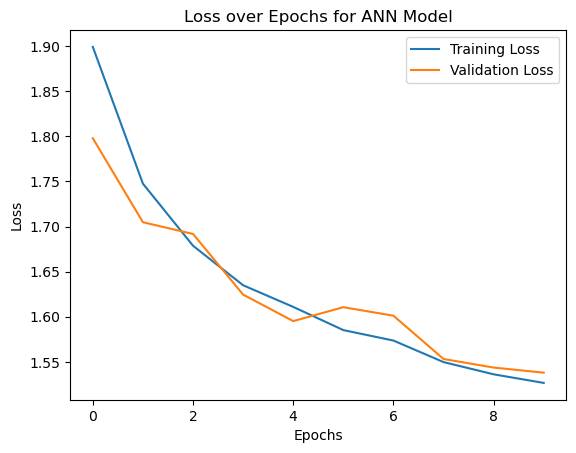

In [57]:
# Plot the Loss over Epochs chart
plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs for ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model
loss_ann, accuracy_ann = ann_model.evaluate(x_test, y_test)
print(f"\nFinal ANN model loss: {loss_ann:.4f}")
print(f"Final ANN model accuracy: {accuracy_ann:.4f}\n")

Validation loss shadows the training loss fairly well, meaning there doesn't seem to be any issues with overfitting or oversampling.

In [32]:
# Make predictions on test data
y_pred_ann = ann_model.predict(x_test)

# Get the predicted class indices
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)

# Map predicted class indices to class names
y_pred_ann_class_names = [class_names[class_idx] for class_idx in y_pred_ann_classes]

# Convert one-hot encoded y_test back to class indices
y_test_classes = np.argmax(y_test, axis=1)

# Map actual class indices from y_test to class names
y_test_class_names = [class_names[class_idx] for class_idx in y_test_classes]

# Display some sample predictions
print(f"Predicted class names for the first 5 test samples: {y_pred_ann_class_names[:5]}")
print(f"Actual class names for the first 5 test samples: {y_test_class_names[:5]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class names for the first 5 test samples: ['cat', 'ship', 'ship', 'ship', 'deer']
Actual class names for the first 5 test samples: ['cat', 'ship', 'ship', 'airplane', 'frog']


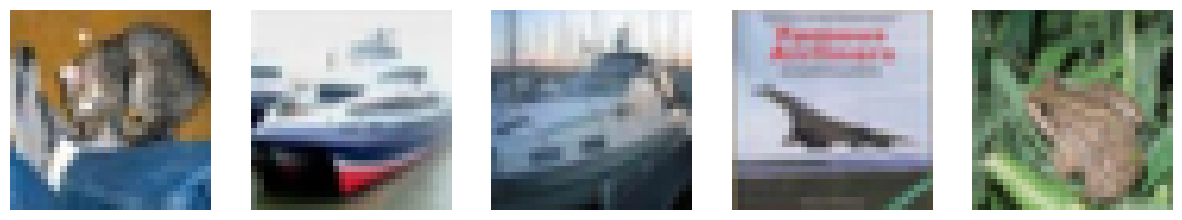

In [30]:
# Show actual first 5 test sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_test[i])
    axes[i].axis('off')

As seen a few steps above, after training, the final validation accuracy for the ANN model was 45.59%. When predicting the classes of the first 5 images in the test dataset, the ANN model did slightly better than this by predicting 3 out of 5 (i.e. 60%) correctly. 

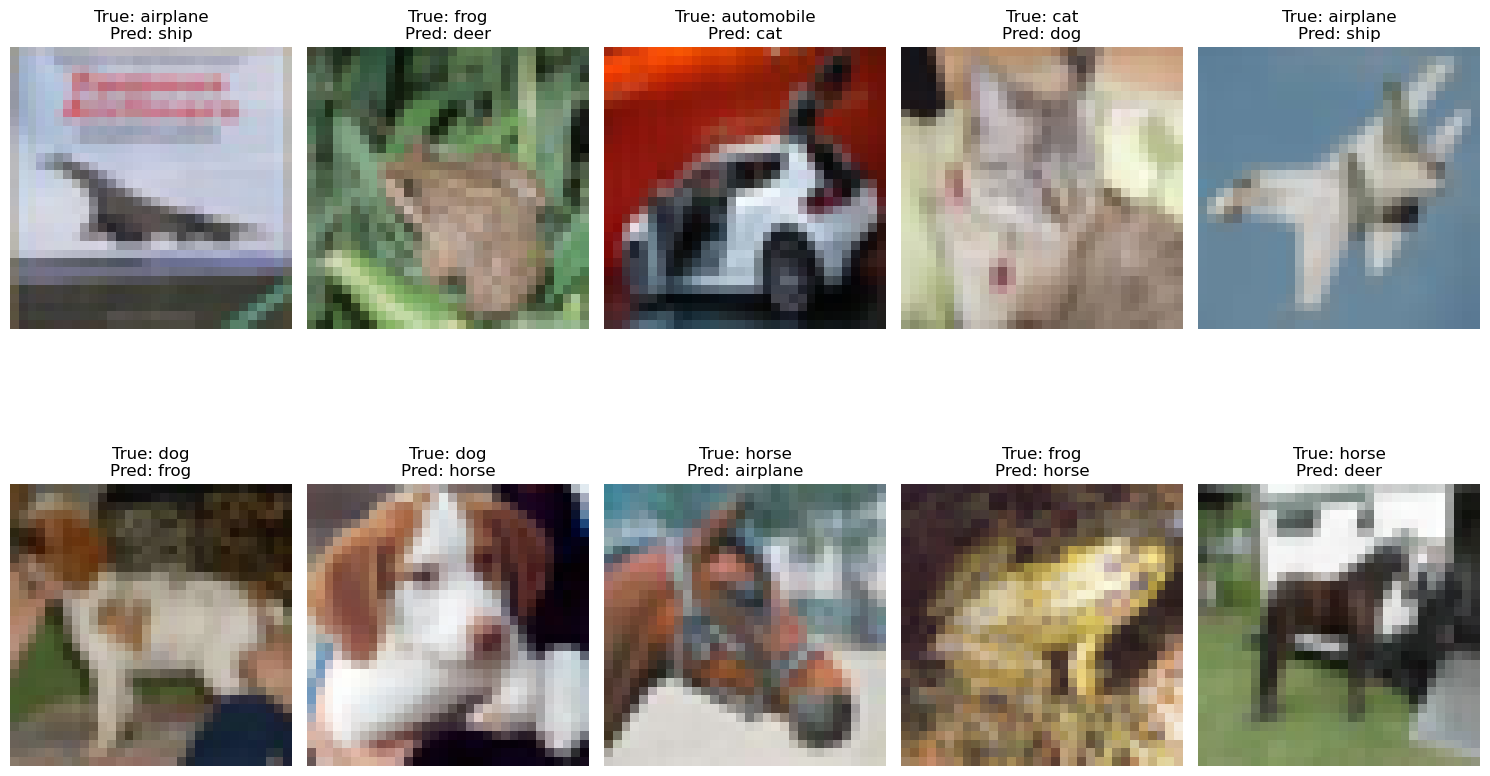

In [53]:
# Identify misclassified indices
incorrect_indices = np.where(y_test_classes != y_pred_ann_classes)[0]

# Visualize the first 10 misclassified images
plt.figure(figsize=(15,10))
for i, idx in enumerate(incorrect_indices[:10]):
	plt.subplot(2, 5, i + 1)
	plt.imshow(x_test[idx])
	plt.title(f"True: {y_test_class_names[idx]}\nPred: {y_pred_ann_class_names[idx]}")
	plt.axis('off')
plt.tight_layout()
plt.show()

From the first 10 misclassified objects shown above, we see that the ANN algorithm is mixing up airplanes with ships, and mostly animals with other animals. However, there are a couple examples of mixing up machies with animals as well (e.g. automobile and cat, and horse and airplane).

ANN Confusion Matrix: 
[[447  28  39  34  47  11  28  77 238  51]
 [ 34 541   7  20  27  12  25  44  87 203]
 [ 72  30 150  84 240  55 184 115  53  17]
 [ 23  25  31 289  98 155 177  95  44  63]
 [ 38  13  42  52 472  30 182 120  35  16]
 [ 25  15  32 198 112 266 137 144  44  27]
 [  8  12  21  92 160  26 597  38  25  21]
 [ 38  18  18  56 112  43  54 591  18  52]
 [ 82  44   6  28  23  17  15  24 682  79]
 [ 43 158   7  41  20  16  30  76  85 524]]


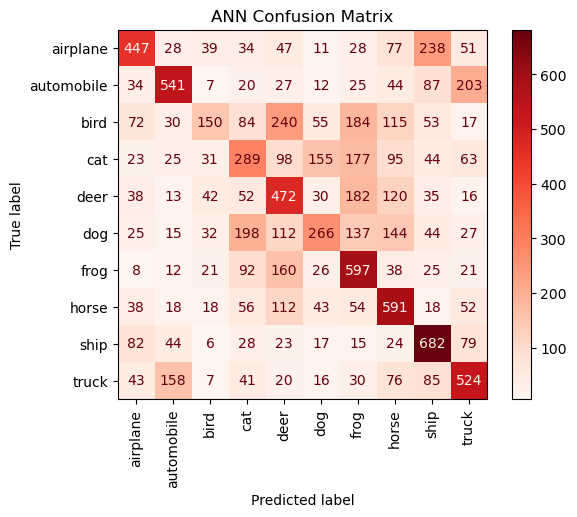

ANN Classification Report: 
              precision    recall  f1-score   support

    airplane       0.55      0.45      0.49      1000
  automobile       0.61      0.54      0.57      1000
        bird       0.42      0.15      0.22      1000
         cat       0.32      0.29      0.31      1000
        deer       0.36      0.47      0.41      1000
         dog       0.42      0.27      0.33      1000
        frog       0.42      0.60      0.49      1000
       horse       0.45      0.59      0.51      1000
        ship       0.52      0.68      0.59      1000
       truck       0.50      0.52      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.44     10000
weighted avg       0.46      0.46      0.44     10000



In [65]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Create a Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test_class_names, y_pred_ann_class_names)
print("ANN Confusion Matrix: ")
print(conf_matrix_ann)

# Visualize the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_ann, display_labels=class_names).plot(cmap='Reds')
plt.title("ANN Confusion Matrix")
plt.xticks(rotation=90) # Rotate the x-axis labels to be vertical
plt.show()

# Generate a Classification Report
class_report_ann = classification_report(y_test_class_names, y_pred_ann_class_names)
print("ANN Classification Report: ")
print(class_report_ann)

Based on the confusion matrix above, we can see that the ANN model often mislabels birds as deer, and airplanes as ships. It also mislabels automobiles as trucks and dogs as cats fairly often. According to the classification report above, specifically the f-1 scores, the ANN model is strongest in its identification of ships (f1-score = 0.59) and automobiles (f1-score = 0.57). It is weakest in its identification of birds (f1-score = 0.22).

### CNN Model

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # 2D Convolutional layer, 32 filters (also called kernels) of size (3, 3)
    MaxPooling2D((2, 2)),                                             # Pooling layer, reduces the size of the feature maps by selecting the maximum value in each (2, 2) window
    Conv2D(64, (3, 3), activation='relu'),                            # Convolutional layer, 64 filters of size (3, 3), will learn more complex features than the previous layer.
    MaxPooling2D((2, 2)),                                             # Pooling layer
    Conv2D(64, (3, 3), activation='relu'),                            # Convolutional layer
    Flatten(),                                                        # Flattens the output of the last convolutional layer (which is a 3D tensor) into a 1D vector
    Dense(64, activation='relu'),                                     # Fully connected layer
    Dropout(0.5),                                                     # Dropout, randomly sets 50% of the neurons' outputs to zero, prevents overfitting
    Dense(10, activation='softmax')                                   # Output layer with 10 classes
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
# Train the CNN model
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.2502 - loss: 1.9893 - val_accuracy: 0.4736 - val_loss: 1.4489
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.4559 - loss: 1.4998 - val_accuracy: 0.5083 - val_loss: 1.3679
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5151 - loss: 1.3600 - val_accuracy: 0.5789 - val_loss: 1.1786
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.5584 - loss: 1.2468 - val_accuracy: 0.6231 - val_loss: 1.0785
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.5970 - loss: 1.1524 - val_accuracy: 0.6410 - val_loss: 1.0164
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6146 - loss: 1.0973 - val_accuracy: 0.6364 - val_loss: 1.0244
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6353 - loss: 1.0458 - val_accuracy: 0.6672 - val_loss: 0.9516
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6557 - loss: 0.9875 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6839 - loss: 0.9015

Final CNN model loss: 0.9092
Final CNN model accuracy: 0.6802



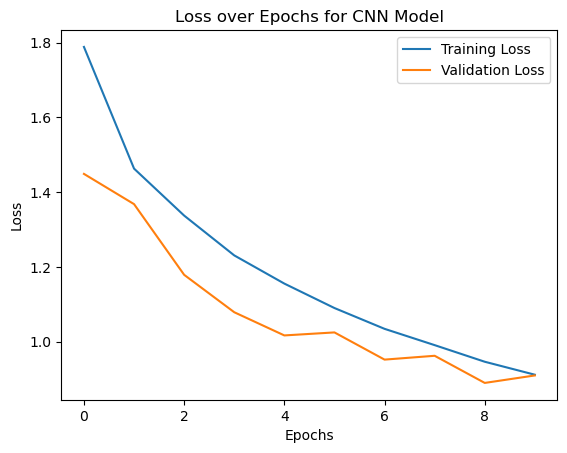

In [59]:
# Plot the Loss over Epochs chart
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test, y_test)
print(f"\nFinal CNN model loss: {loss_cnn:.4f}")
print(f"Final CNN model accuracy: {accuracy_cnn:.4f}\n")

Again, validation loss shadows the training loss fairly well, so there doesn't seem to be any issues with overfitting or oversampling.

In [42]:
# Make predictions on test data
y_pred_cnn = cnn_model.predict(x_test)

# Get the predicted class indices
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Map predicted class indices to class names
y_pred_cnn_class_names = [class_names[class_idx] for class_idx in y_pred_cnn_classes]

# Map actual class indices from y_test to class names
y_test_class_names = [class_names[class_idx] for class_idx in y_test_classes]

# Display some sample predictions
print(f"Predicted class names for the first 5 test samples: {y_pred_cnn_class_names[:5]}")
print(f"Actual class names for the first 5 test samples: {y_test_class_names[:5]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted class names for the first 5 test samples: ['cat', 'ship', 'airplane', 'airplane', 'frog']
Actual class names for the first 5 test samples: ['cat', 'ship', 'ship', 'airplane', 'frog']


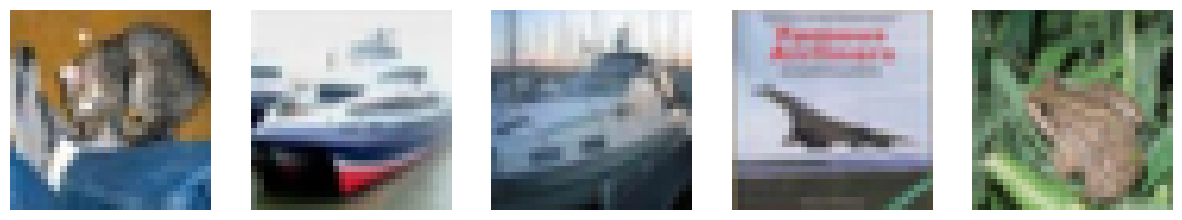

In [41]:
# Show actual first 5 test sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_test[i])
    axes[i].axis('off')

The CNN model predicted the class names of the first 5 test images more accurately (4 out of 5 correct = 80% accuracy) than the ANN model (60% accuracy). Interestingly though, the CNN model predicted the third image incorrectly (predicted airplane when it was actually a ship), while the ANN model predicted this same image correctly. This suggests that while the CNN model is overall a stronger model for image recognition with this dataset, the ANN model potentially has some strengths where the CNN might have some weaknesses.

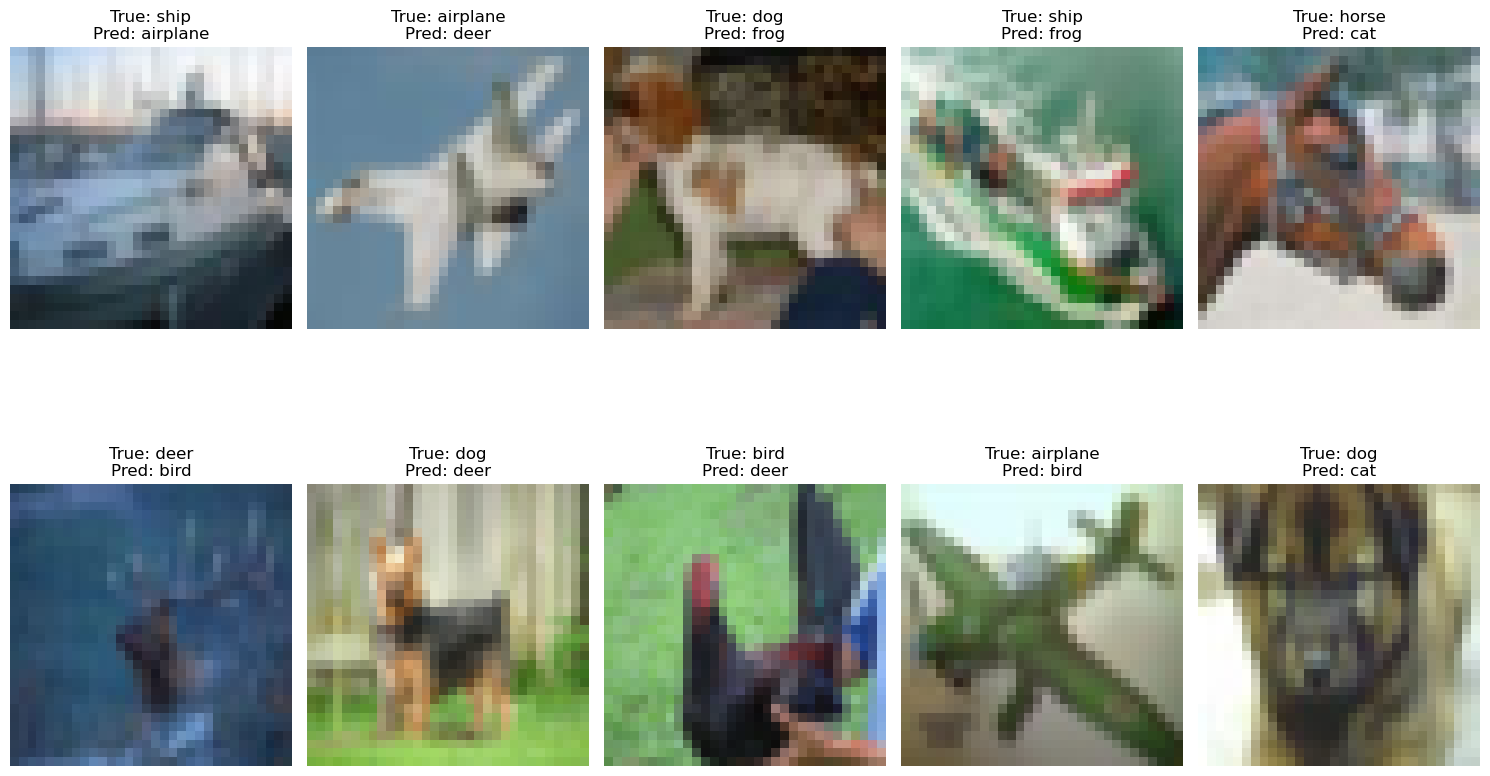

In [55]:
# Identify misclassified indices
incorrect_indices = np.where(y_test_classes != y_pred_cnn_classes)[0]

# Visualize the first 10 misclassified images
plt.figure(figsize=(15,10))
for i, idx in enumerate(incorrect_indices[:10]):
	plt.subplot(2, 5, i + 1)
	plt.imshow(x_test[idx])
	plt.title(f"True: {y_test_class_names[idx]}\nPred: {y_pred_cnn_class_names[idx]}")
	plt.axis('off')
plt.tight_layout()
plt.show()

In the first 10 misclassifications from the CNN model, we again see mix ups between a ship and an airplane, however, here we actually have more examples of misclassifying machines as animals (e.g. classifying an airplane as a deer, ship as a frog, and airplane as a bird). It seems like the colors (i.e. green hues in two of these images) might be contributing to the misclassifications.

CNN Confusion Matrix: 
[[664  25 119  30  17   4  21  11  65  44]
 [ 10 853   8  13   2   2  20   2  19  71]
 [ 43   7 579  85  48  72 129  19  10   8]
 [  5   7  80 545  43 168 120  11   7  14]
 [ 13   3 110 120 525  29 149  44   7   0]
 [  5   1  60 261  30 560  54  22   2   5]
 [  4   1  34  58  10   7 880   2   1   3]
 [  9   2  40  75  69 113  22 649   3  18]
 [ 74  41  20  39   9   6  10   4 772  25]
 [ 17  86  12  31   4   8  24  15  28 775]]


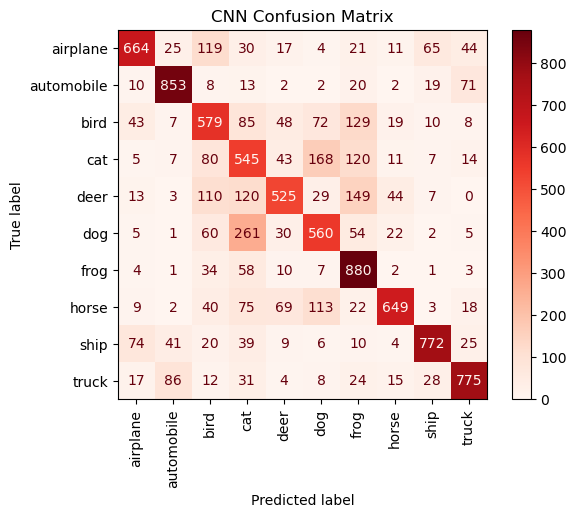

CNN Classification Report: 
              precision    recall  f1-score   support

    airplane       0.79      0.66      0.72      1000
  automobile       0.83      0.85      0.84      1000
        bird       0.55      0.58      0.56      1000
         cat       0.43      0.55      0.48      1000
        deer       0.69      0.53      0.60      1000
         dog       0.58      0.56      0.57      1000
        frog       0.62      0.88      0.72      1000
       horse       0.83      0.65      0.73      1000
        ship       0.84      0.77      0.81      1000
       truck       0.80      0.78      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [66]:
# Create a Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_test_class_names, y_pred_cnn_class_names)
print("CNN Confusion Matrix: ")
print(conf_matrix_cnn)

# Visualize the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_cnn, display_labels=class_names).plot(cmap='Reds')
plt.title("CNN Confusion Matrix")
plt.xticks(rotation=90) # Rotate the x-axis labels to be vertical
plt.show()

# Generate a Classification Report
class_report_cnn = classification_report(y_test_class_names, y_pred_cnn_class_names)
print("CNN Classification Report: ")
print(class_report_cnn)

We can see that the CNN Confusion Matrix above looks much cleaner than the ANN Confusion Matrix further up. That being said, it looks like the CNN model still often mislabels dogs as cats, and to a lesser but still significant degree, cats as dogs (or even frogs). According to the CNN Classification Report, specifically the f1-scores, the CNN model is strongest in its identification of automobiles (f1-score = 0.84) and weakest in its identification of cats (f1-score = 0.48). That being said, the f1-scores across all classes are significantly higher for the CNN model vs the ANN model.

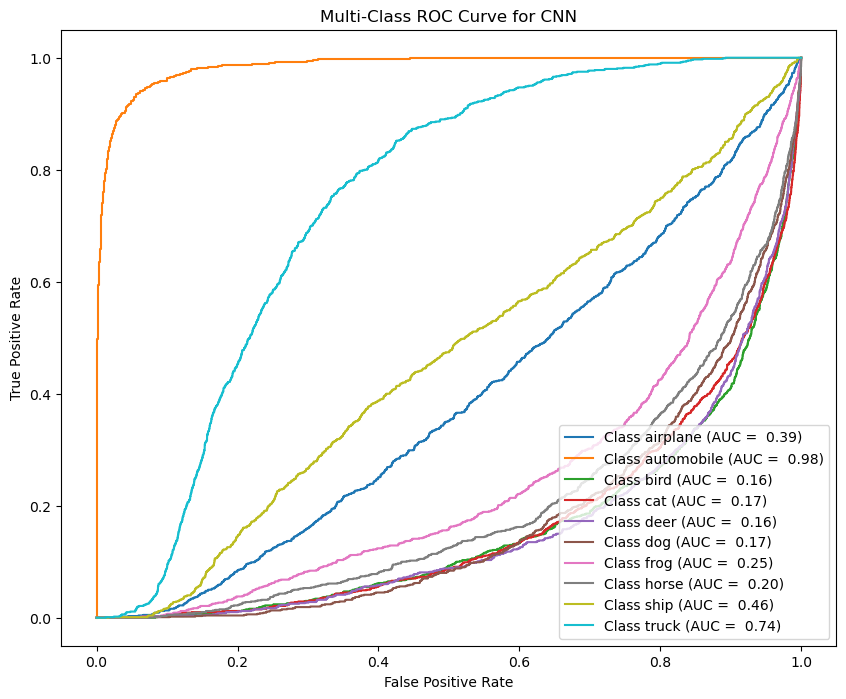

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
# 'range(10)' ensures we cover all 10 classes in CIFAR-10

y_test_binarized = label_binarize(y_test, classes=range(10))

# Compure ROC and AUC for each class
plt.figure(figsize=(10, 8))
for i in range(10): #Loop through each class
	fpr, tpr, _ = roc_curve(y_test_binarized[:, 1], y_pred_cnn[:, i]) # computer FPR and TPR
	roc_auc = auc(fpr, tpr) #computer AUC for the class
	plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc: .2f})') # Plot ROC for this class
	
plt.title('Multi-Class ROC Curve for CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right') 

If we evaluate the CNN model using strictly the AUC scores from the binarized classes, the model is strongest in identifying automobiles and weakest in identifying birds and deer.

In [43]:
# Compare the 2 models
print(f"ANN Model Test Accuracy: {accuracy_ann:.4f}")
print(f"CNN Model Test Accuracy: {accuracy_cnn:.4f}")

ANN Model Test Accuracy: 0.4559
CNN Model Test Accuracy: 0.6802


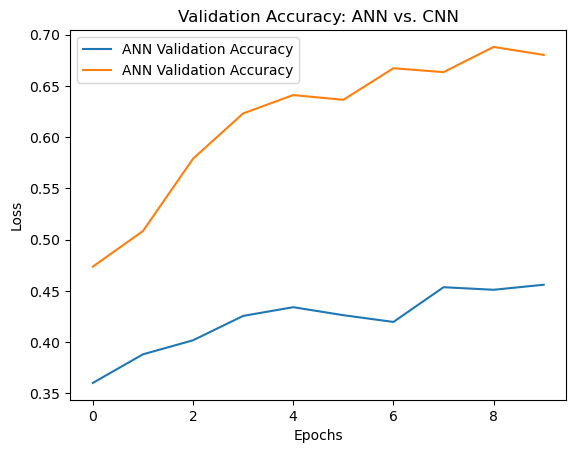

In [68]:
# Plot the Loss over Epochs chart for both models
plt.plot(history_ann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='ANN Validation Accuracy')
plt.title('Validation Accuracy: ANN vs. CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

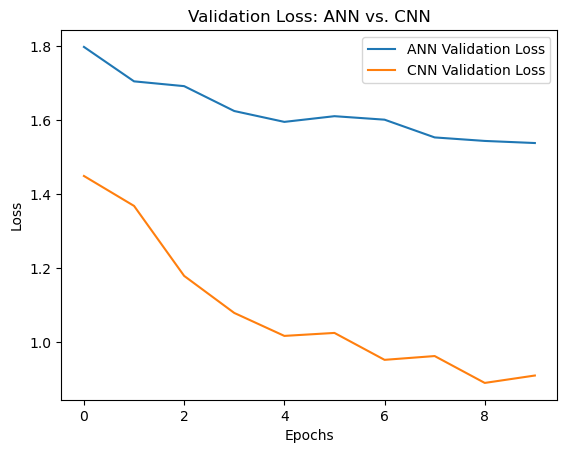

In [67]:
# Plot the Loss over Epochs chart for both models
plt.plot(history_ann.history['val_loss'], label='ANN Validation Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('Validation Loss: ANN vs. CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As noted above, after training, the final validation accuracy for the CNN model was 68.02%. This is significantly higher than the final ANN model final validation accuracy of 45.59%. The Validation Accuracy chart above also confirms the higher level of accuracy in the CNN model compared to the ANN model throughout all the training epochs. Similarly, the Validation Loss chart displays the lower level of loss with the CNN model compared to the ANN model throughout all the training epochs also. Because of the CNN model's ability to learn spatial patterns, it is the obvious choice for a image recognition dataset like this one. 